Populating the interactive namespace from numpy and matplotlib


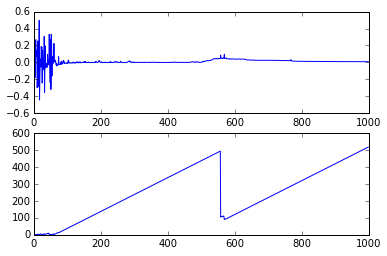

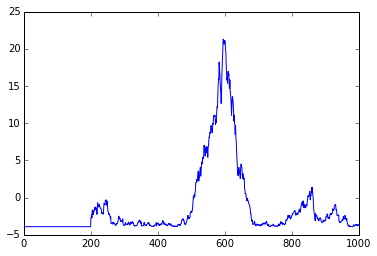

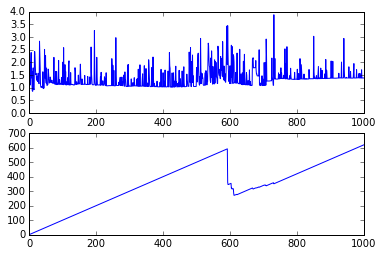

0.9353125
0.94275
0.660625


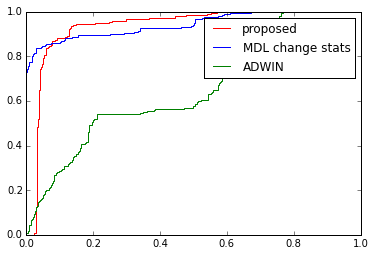

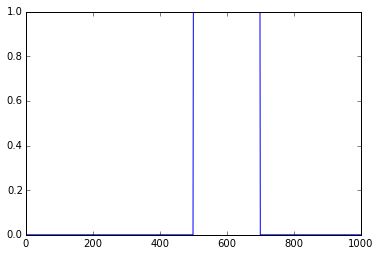

In [6]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 1
t_true = [500]
T = 200

#calculate scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.05)
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreは統計量の最大値
# benefit は 矩形
plt.figure(2)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


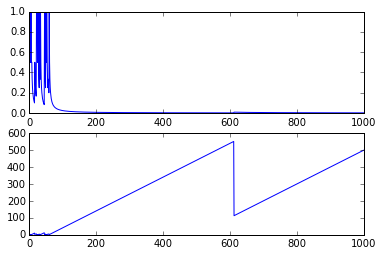

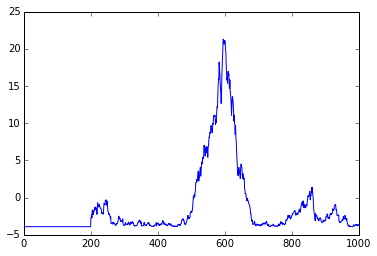

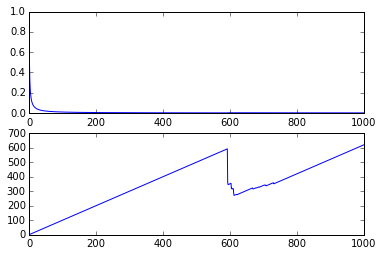

0.609352819237
0.492115754561
0.66296185738


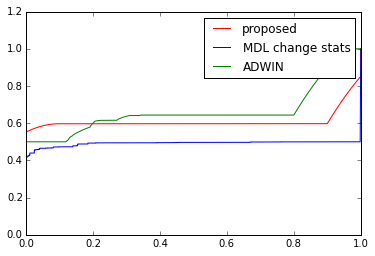

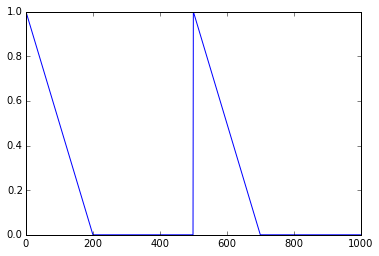

In [4]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 1
t_true = [0, 500]
T = 200

#calculate scores
ins = mdladwn2.MDLCPStat_adwin(lossfunc=mdladwn2.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.1)
score = ev.InvRunLen(size[0])
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreは統計量の最大値
# benefit は 三角形
plt.figure(2)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


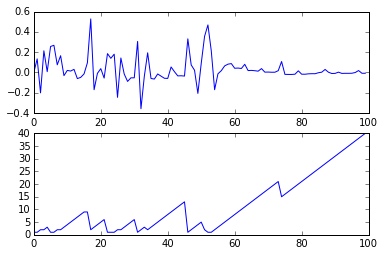

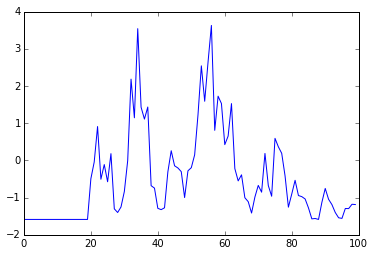

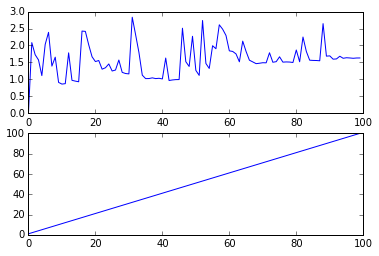

0.73
0.8125
0.654375


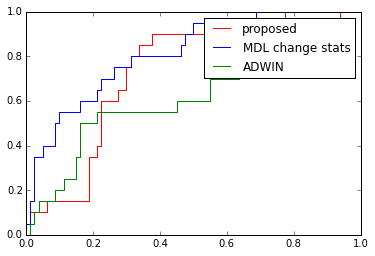

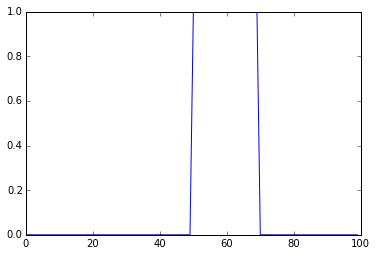

In [67]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=100)
for i in range(50,100):
    data[i] = data[i] + 1
t_true = [50]
T = 20

#calculate scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.09)
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=10, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(100) * (min(score2[20:100]))
score2_[20:100] = score2[20:100]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreは統計量の最大値
# benefit は 矩形
plt.figure(2)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


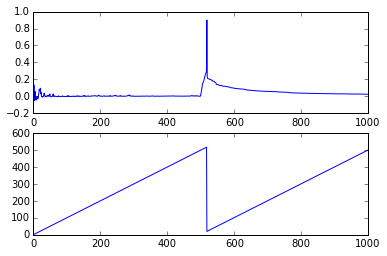

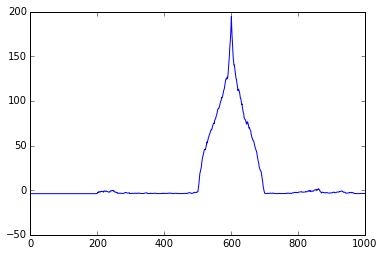

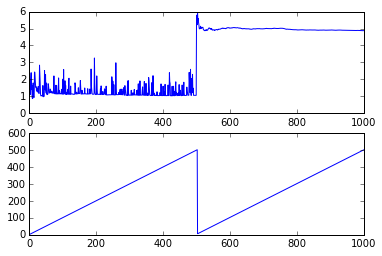

0.9941625
0.99774375
0.932325


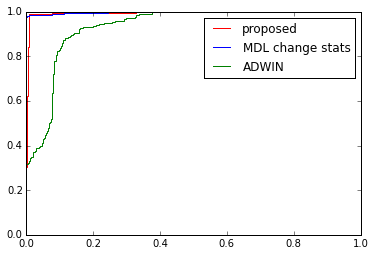

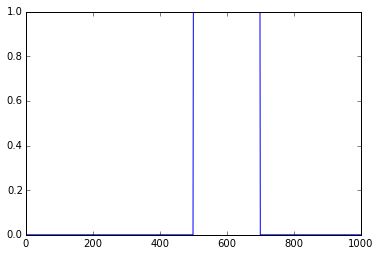

In [37]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 5
t_true = [500]
T = 200

#calculate scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.3)
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreは統計量の最大値
# benefit は 矩形
plt.figure(2)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


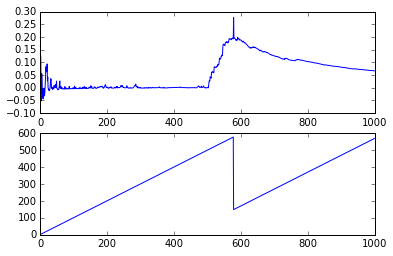

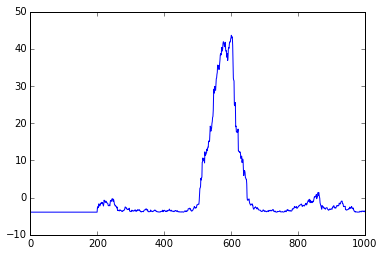

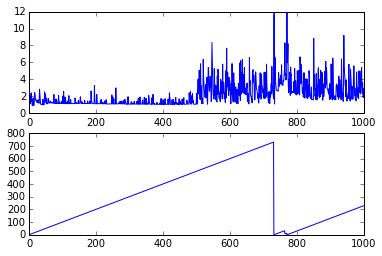

0.93774375
0.92515625
0.743375


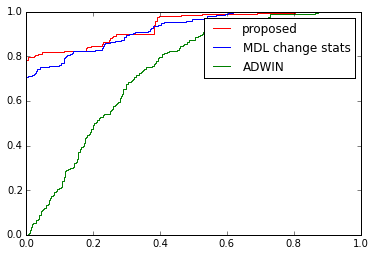

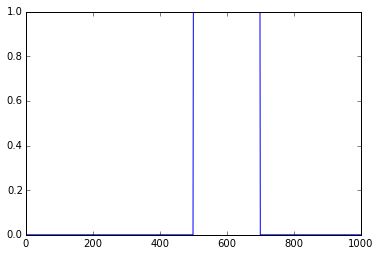

In [14]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] * 3
t_true = [500]
T = 200

#calculate scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.2)
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreは統計量の最大値
# benefit は 矩形
plt.figure(2)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


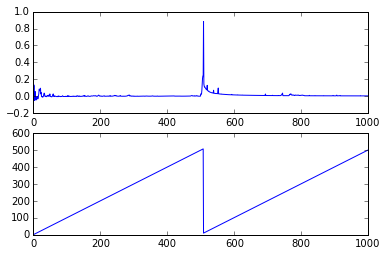

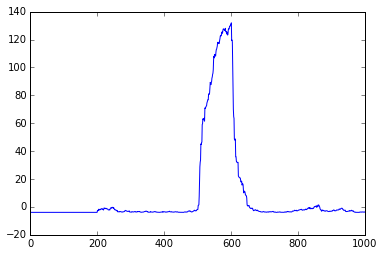

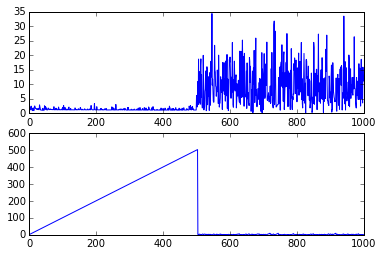

0.954875
0.93794375
0.7778875


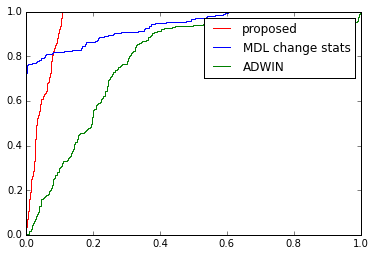

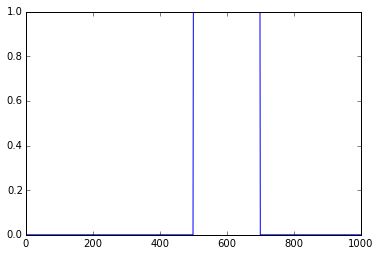

In [8]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] * 8
t_true = [500]
T = 200

#calculate scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.3)
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreは統計量の最大値
# benefit は 矩形
plt.figure(2)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


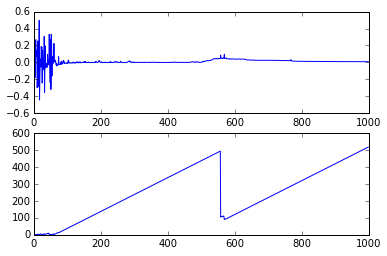

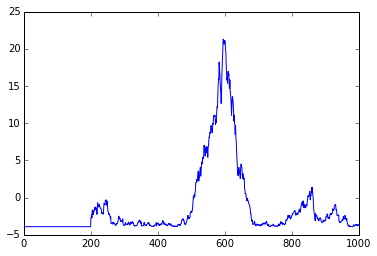

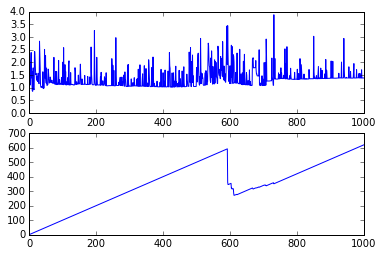

0.913589800995
0.987548631841
0.69106909204


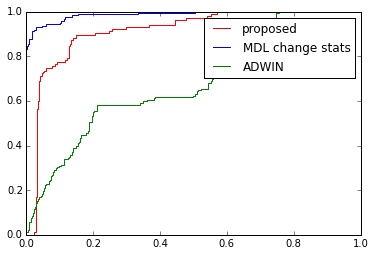

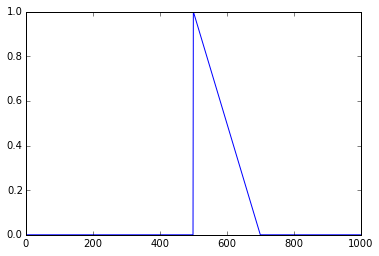

In [1]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 1
t_true = [500]
T = 200

#calculate scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.05)
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreは統計量の最大値
# benefit は 三角形
plt.figure(2)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [13]:
min(1,2)

1

Populating the interactive namespace from numpy and matplotlib


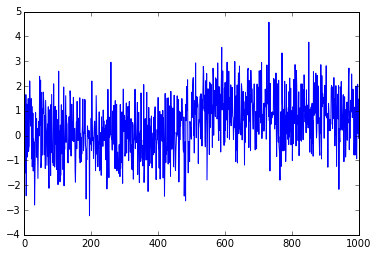

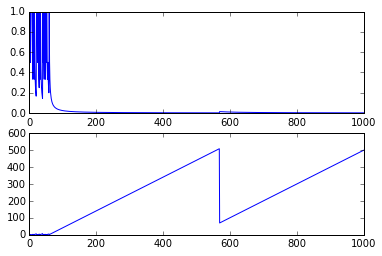

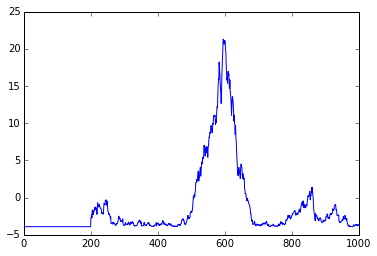

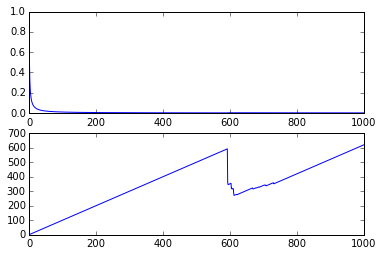

0.727014510779
0.492115754561
0.66296185738


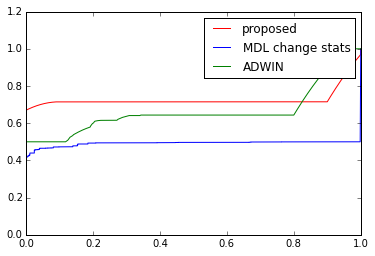

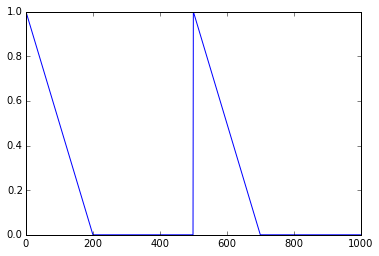

In [14]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn



# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500, 1000):
    data[i] = data[i] + 1
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.06)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
t_true = [0, 500]
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


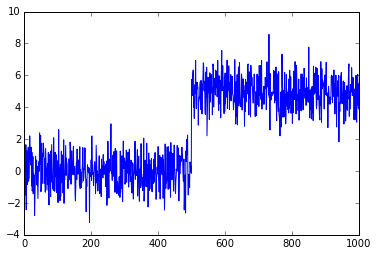

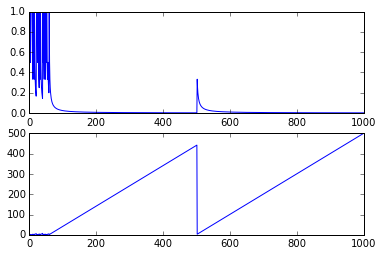

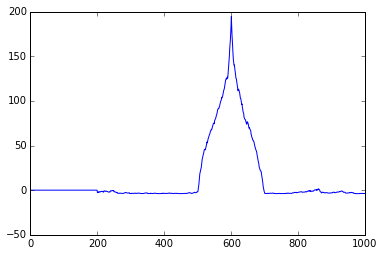

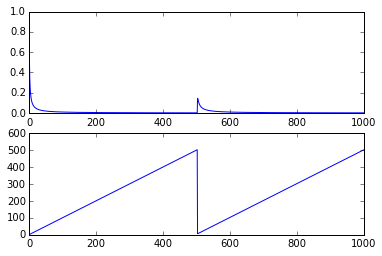

0.989520584577
0.986698217247
0.985165713101


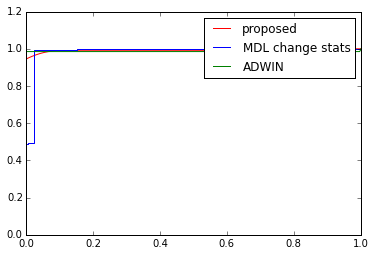

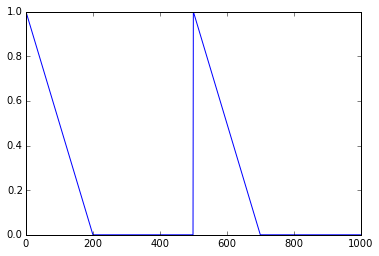

In [16]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn



# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500, 1000):
    data[i] = data[i] + 5
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.06)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
#score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_ = np.ones(1000) * 0
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
t_true = [0, 500]
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[ 822.  367.  470.  208.  259.]
[  822.  1189.  1659.  1867.  2126.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


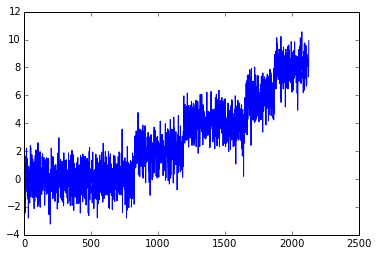

In [7]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
        s = s +  1 * H(x - cusum[i - 1])
#        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

- 断続的変化(平均)

Populating the interactive namespace from numpy and matplotlib
[ 252.  500.  651.  495.  375.]
[  252.   752.  1403.  1898.  2273.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


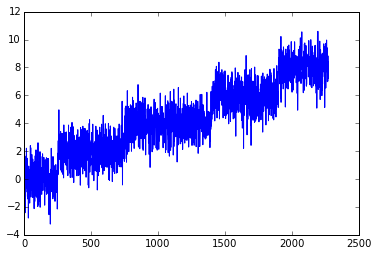

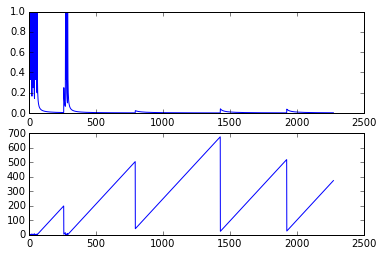

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


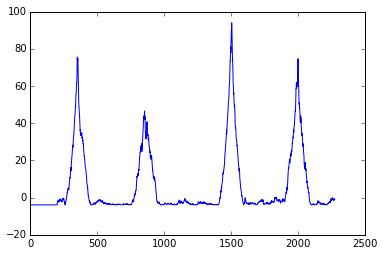

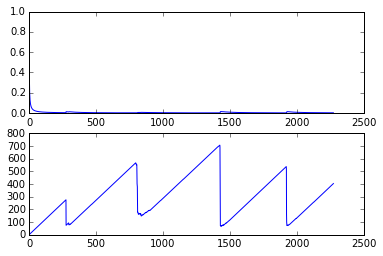

0.845189988783
0.762642443712
0.82411101992


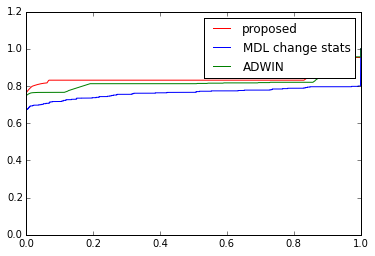

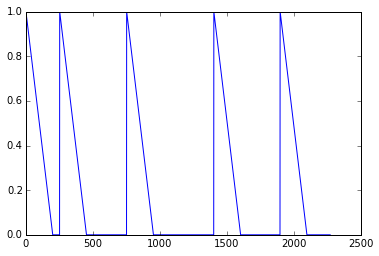

In [8]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
        s = s +  1 * H(x - cusum[i - 1])
#        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.06)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[ 263.  196.  646.  143.  309.]

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



[  263.   459.  1105.  1248.  1557.]


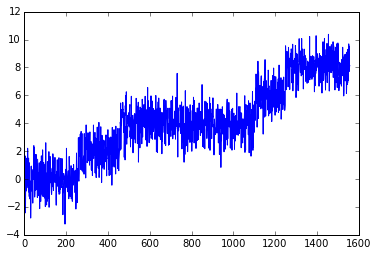

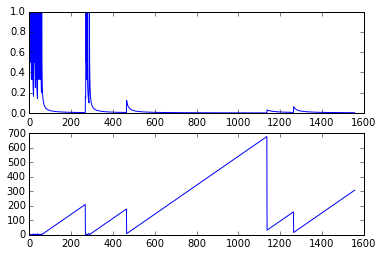

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


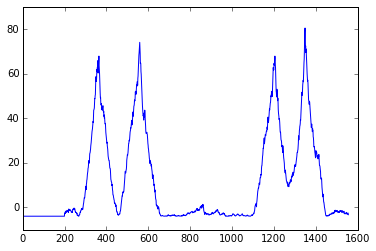

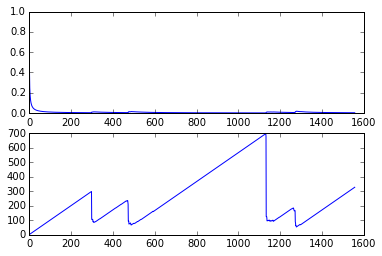

0.936216752613
0.768692957346
0.92532193095


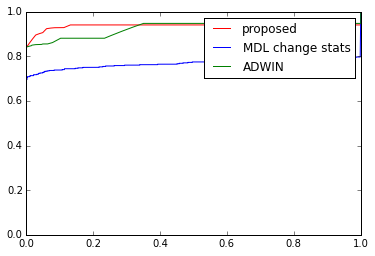

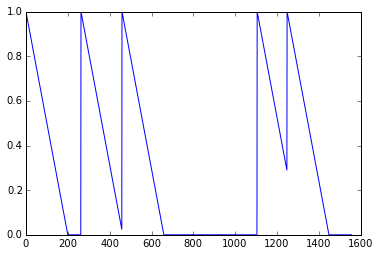

In [1]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
        s = s +  1 * H(x - cusum[i - 1])
#        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.06)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[ 835.  341.  886.  375.   89.]
[  835.  1176.  2062.  2437.  2526.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


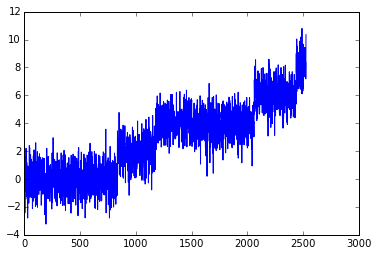

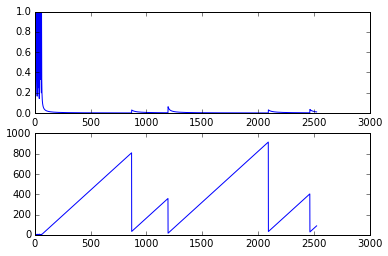

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


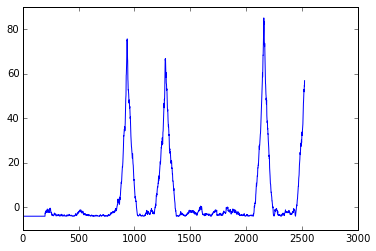

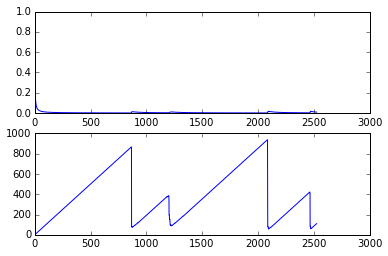

0.837601057769
0.751624084989
0.846167962573


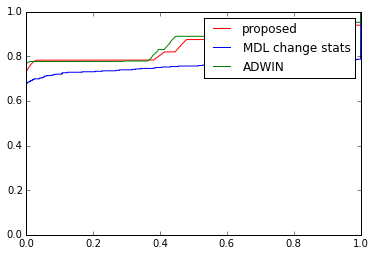

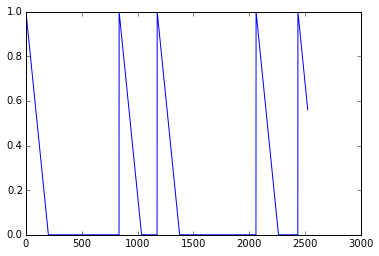

In [17]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
        s = s +  1 * H(x - cusum[i - 1])
#        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.06)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[ 984.  667.  871.   97.  928.]
[  984.  1651.  2522.  2619.  3547.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


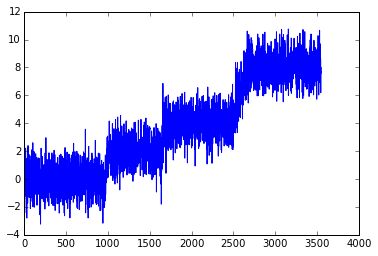

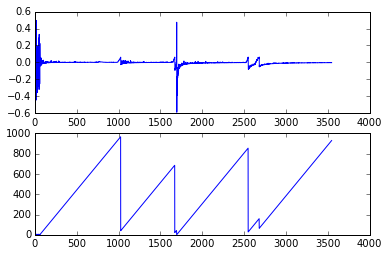

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


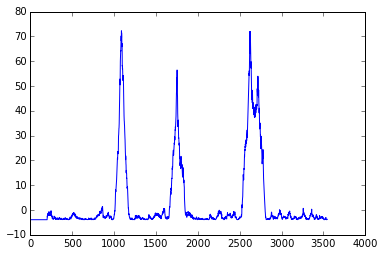

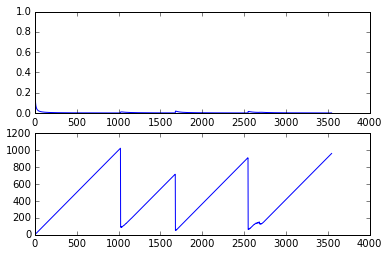

0.38130193518
0.760056589495


KeyboardInterrupt: 

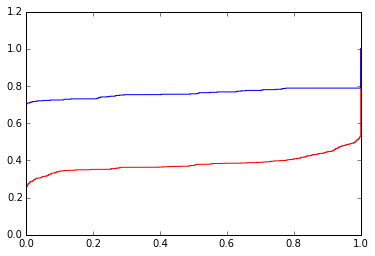

In [26]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
        s = s +  1 * H(x - cusum[i - 1])
#        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn2.MDLCPStat_adwin(lossfunc=mdladwn2.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.06)
#score = ev.InvRunLen(size[0])
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

- 断続的変化(分散)

Populating the interactive namespace from numpy and matplotlib
[ 220.  782.  885.   15.  464.]
[  220.  1002.  1887.  1902.  2366.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


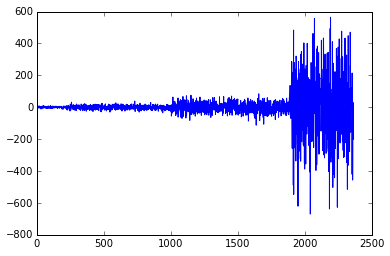

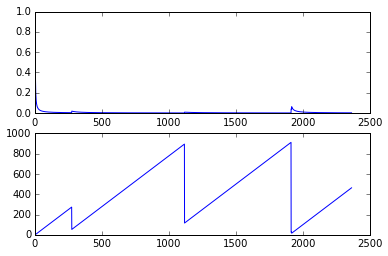

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


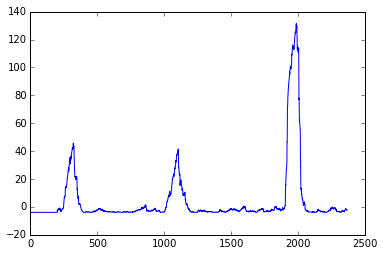

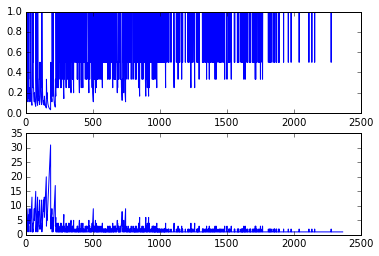

0.73425531257
0.721514976193
0.413717288676


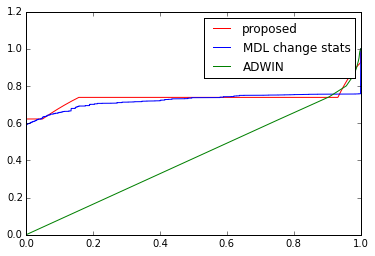

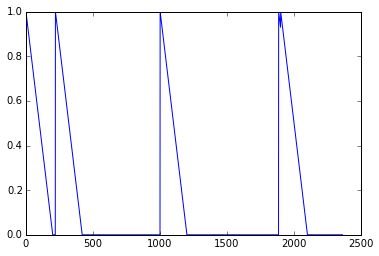

In [90]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
        s = s  +  1 * H(x - cusum[i - 1]) ###
#        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#平均の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 4 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.16)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[  77.  560.  797.   15.  688.]
[   77.   637.  1434.  1449.  2137.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


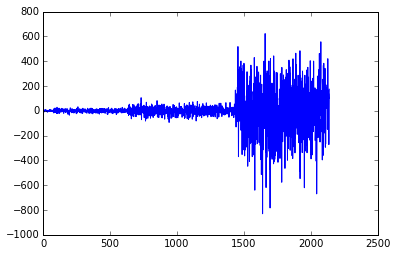

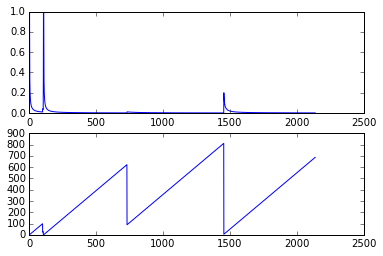

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


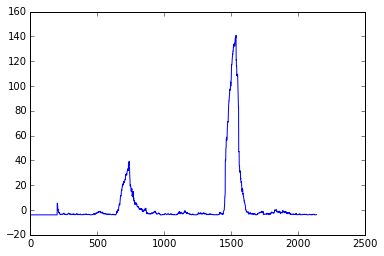

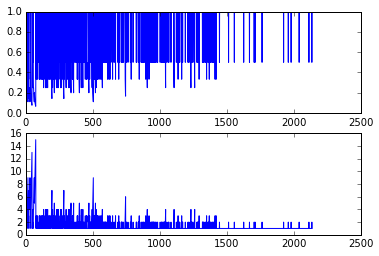

0.802445562743
0.573262237862
0.431411235082


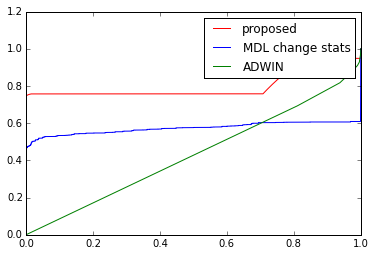

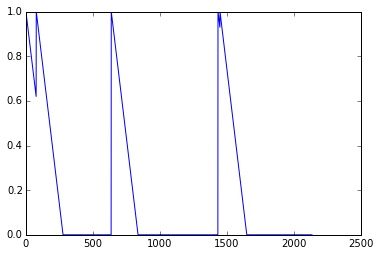

In [92]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
        s = s  +  1 * H(x - cusum[i - 1]) ###
#        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#分散の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 4 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.16)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[ 674.  126.  397.  476.  613.]
[  674.   800.  1197.  1673.  2286.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


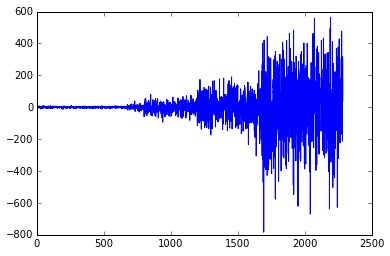

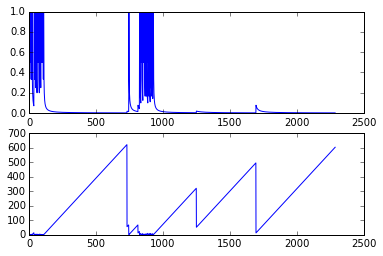

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


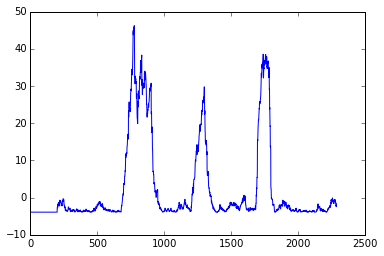

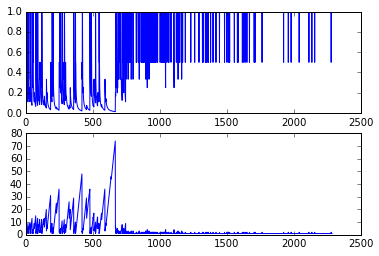

0.817485564986
0.749861721818
0.556887736445


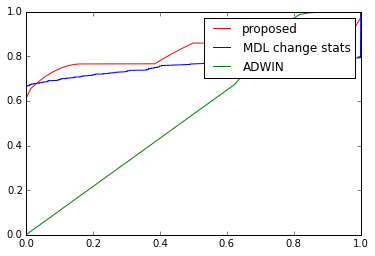

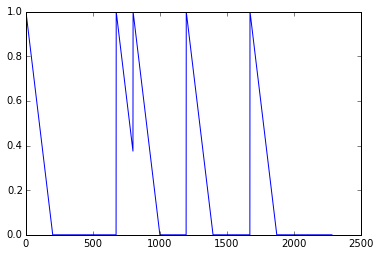

In [95]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
        s = s  +  1 * H(x - cusum[i - 1]) ###
#        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#平均の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 4 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.13)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[ 705.  372.  628.  258.  927.]
[  705.  1077.  1705.  1963.  2890.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


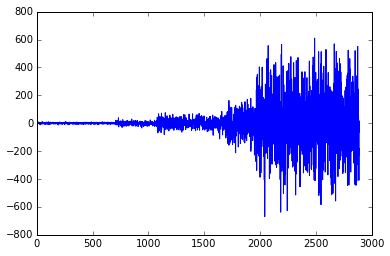

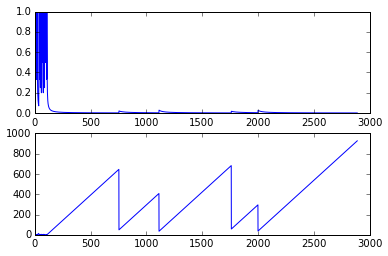

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


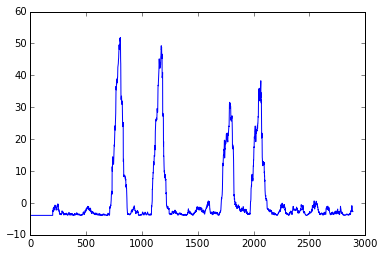

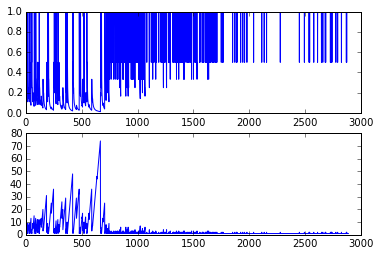

0.793667653795
0.752913459159
0.538622430177


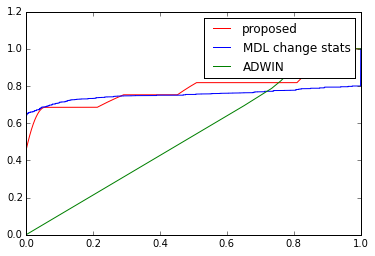

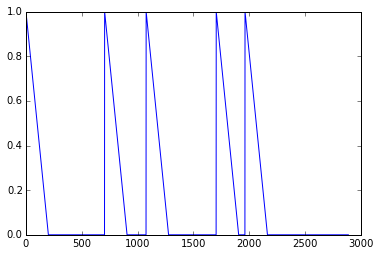

In [96]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
        s = s  +  1 * H(x - cusum[i - 1]) ###
#        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#平均の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 4 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.13)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

- 連続的変化(平均)

Populating the interactive namespace from numpy and matplotlib
[ 900.  116.  530.  347.  792.]
[  900.  1016.  1546.  1893.  2685.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


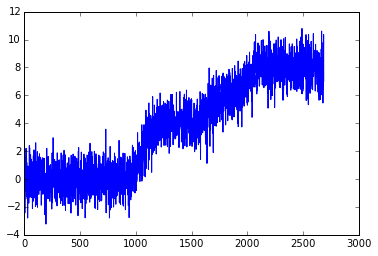

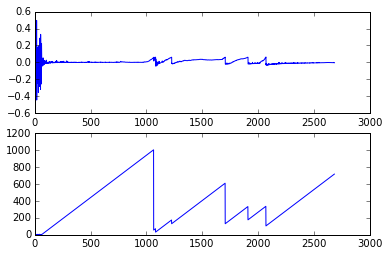

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


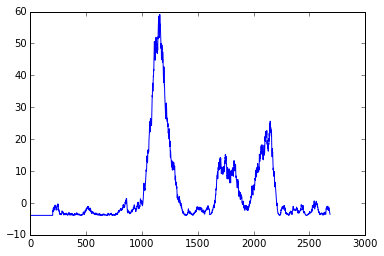

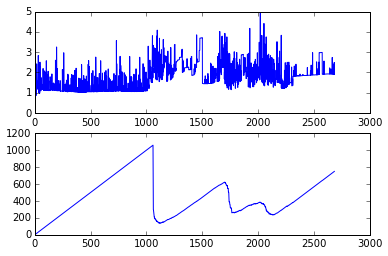

0.593171338031
0.58736448074
0.522295868114


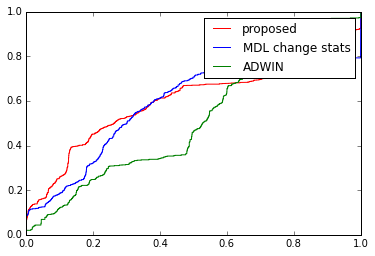

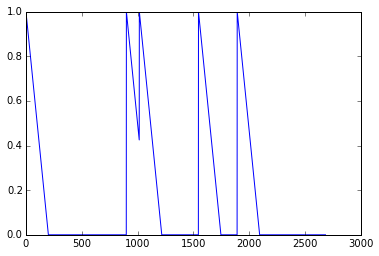

In [36]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 200:
        return x / 200
    else:
        return 1

def I(x):
    s = 0
    for i in range(1, 5):
        s = s +  1 * S(x - cusum[i - 1])
#        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.06)
#score = ev.InvRunLen(size[0])
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
#score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[ 662.  110.  498.  653.   70.]
[  662.   772.  1270.  1923.  1993.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


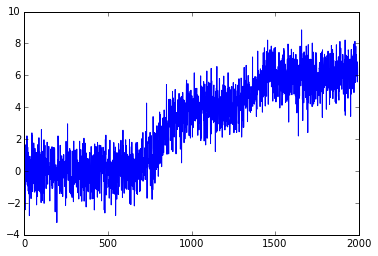

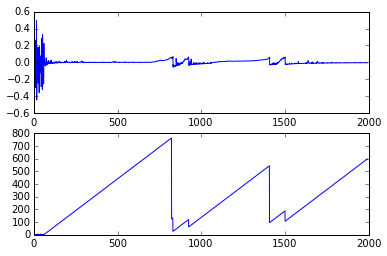

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


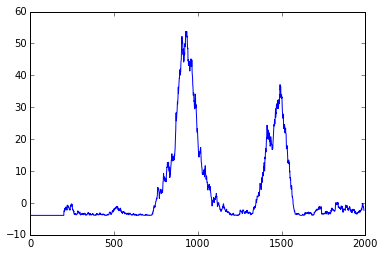

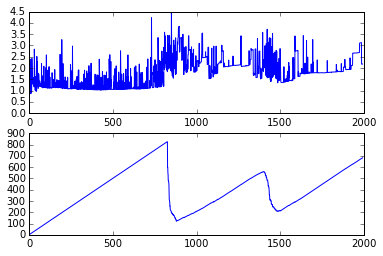

0.651229863981
0.470788806401
0.60677668265


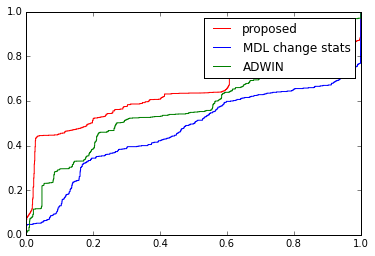

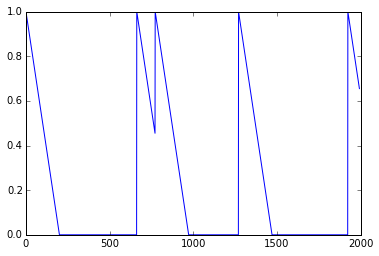

In [35]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 200:
        return x / 200
    else:
        return 1

def I(x):
    s = 0
    for i in range(1, 5):
        s = s +  1 * S(x - cusum[i - 1])
#        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.06)
#score = ev.InvRunLen(size[0])
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
#score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)


Populating the interactive namespace from numpy and matplotlib
[ 599.  886.   25.  848.  420.]
[  599.  1485.  1510.  2358.  2778.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


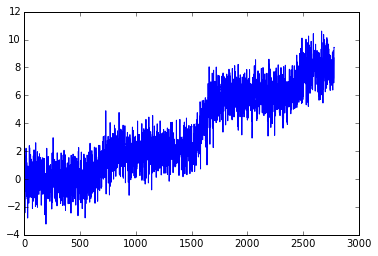

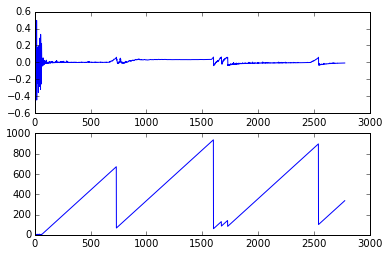

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


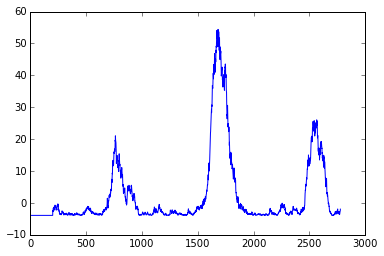

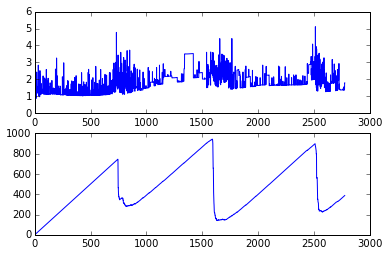

0.603375102211
0.518382090766
0.519403990246


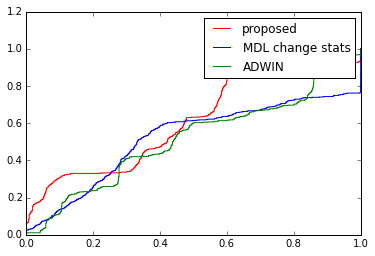

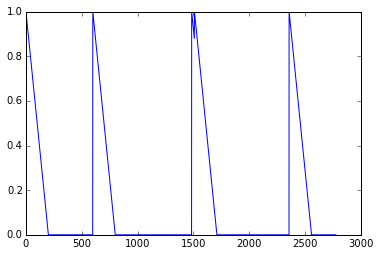

In [31]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 200:
        return x / 200
    else:
        return 1

def I(x):
    s = 0
    for i in range(1, 5):
        s = s +  1 * S(x - cusum[i - 1])
#        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.06)
#score = ev.InvRunLen(size[0])
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
#score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)


In [12]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

aucs = np.zeros((3, 30))
for k in range(0, 30):
        #変化幅を乱数で変える
    n = 5
    change_step = np.zeros(n)
    cusum = np.zeros(n)
    change_step[0] = rn.randint(1,1000)
    cusum[0] = change_step[0]
    for i in range(1,n):
        change_step[i] = rn.randint(1,1000)
        cusum[i] = cusum[i-1] + change_step[i]

    #関数の準備
    def S(x):
        if x < 0:
            return 0
        elif 0 <= x < 200:
            return x / 200
        else:
            return 1

    def I(x):
        s = 0
        for i in range(1, 5):
            s = s +  1 * S(x - cusum[i - 1])
    #        s = s + (5-i) * S(x - cusum[i - 1])
        return s

    #平均の列を作成
    mu = np.zeros(cusum[n-1])
    for i in range(0, int(cusum[n-1])):
        mu[i] =  2* I(i)

    # generate data
    rng = np.random.RandomState(123)
    data = rng.normal(size=int(cusum[n-1]))
    for i in range(0, int(cusum[n-1])):
        data[i] = data[i] + mu[i]

    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 0.06)
    score = ev.InvRunLen(size[0])
    #score = size[1]

    stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score2 = stat.transform(X=data)
    score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
    score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]

    ins = adwin.ADWIN(a=1)
    size3 = ins.transform(X=data, delta = 0.5)
    #score3 = size3[1]
    score3 = ev.InvRunLen(size3[0])

    # plot ROC curves
    # ADWIN, proposedのscoreはinverse run length
    # 変化点は0を含む
    # benefit は 三角形
    T = 200
    #t_true = cusum[:(n-1)]
    t = np.ndarray.tolist(cusum[:(n-1)])
    t_true = [0]
    t_true = t_true + t
    plt.figure(5)
    x = []
    y = []
    p = [min(score)-1] + sorted(score)
    for beta in p:
        e = ev.B(score, beta, t_true, T)
        f  = ev.N(score, beta, t_true, T)
        g = ev.supB(score, t_true, T)
        h = ev.supN(score, t_true, T)
        x.append(f/h)
        y.append(e/g)
    aucs[0, k] = auc(x,y)

    x2 = []
    y2 = []
    p = [min(score2_) - 1] + sorted(score2_)
    for beta in p:
        e2 = ev.B(score2_, beta, t_true, T)
        f2  = ev.N(score2_, beta, t_true, T)
        g2 = ev.supB(score2_, t_true, T)
        h2 = ev.supN(score2_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs[1, k] = auc(x2,y2)

    x3 = []
    y3 = []
    p = [min(score3) - 1] + sorted(score3)
    for beta in p:
        e3 = ev.B(score3, beta, t_true, T)
        f3  = ev.N(score3, beta, t_true, T)
        g3 = ev.supB(score3, t_true, T)
        h3 = ev.supN(score3, t_true, T)
        x3.append(f3/h3)
        y3.append(e3/g3)
    aucs[2, k] = auc(x3,y3)


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:60: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Populating the interactive namespace from numpy and matplotlib


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:61: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


KeyboardInterrupt: 

In [13]:
aucs

array([[ 0.343084  ,  0.35862001,  0.4932783 ,  0.30516557,  0.53453666,
         0.63244355,  0.48398396,  0.36275678,  0.56005961,  0.60234558,
         0.52085327,  0.39997805,  0.55419742,  0.46169181,  0.39318024,
         0.60555901,  0.43853317,  0.61864412,  0.37103247,  0.43385315,
         0.55166944,  0.55124116,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.5696698 ,  0.4284642 ,  0.50726215,  0.45752269,  0.51661607,
         0.61107721,  0.31180302,  0.47952369,  0.57280559,  0.53695997,
         0.32161834,  0.5523669 ,  0.46624552,  0.4880029 ,  0.58723609,
         0.28559691,  0.53084853,  0.56202782,  0.55817857,  0.51634427,
         0.44734079,  0.5088596 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.31778344,  0.34293906,  0.46794454,  0.28428651,  0.50413742,
         0.60929668,  0.39172848,  0.3555331 ,  0

In [19]:
a = np.mean(aucs[0])
print(a)
b = np.mean(aucs[1])
print(b)
c = np.mean(aucs[2])
print(c)

0.352556910539
0.360545687653
0.325055417219


Populating the interactive namespace from numpy and matplotlib
[ 407.  102.  110.  971.  530.]
[  407.   509.   619.  1590.  2120.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


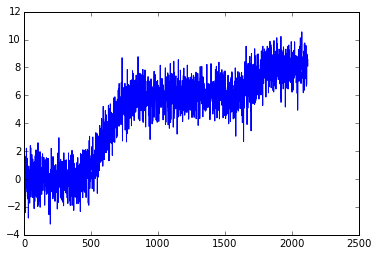

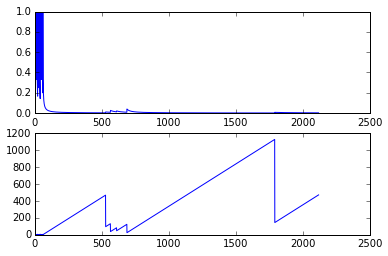

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


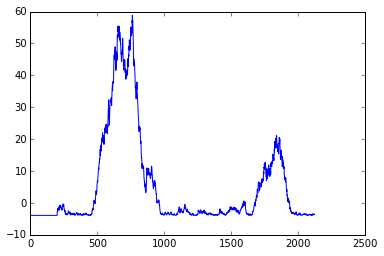

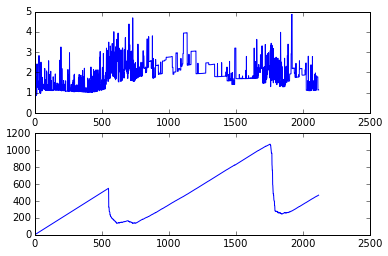

0.666348477418
0.589592035021
0.432654190014


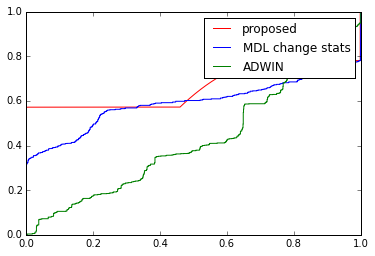

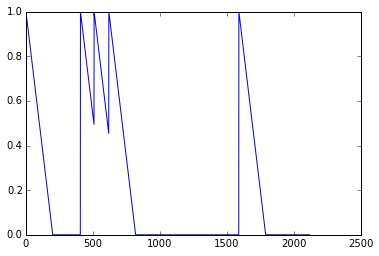

In [16]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 200:
        return x / 200
    else:
        return 1

def I(x):
    s = 0
    for i in range(1, 5):
        s = s +  1 * S(x - cusum[i - 1])
#        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.06)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
#score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5) 
b = ev.benefit(score, t_true, T)
plt.plot(b)

- 連続的変化(分散)

Populating the interactive namespace from numpy and matplotlib
[ 849.  770.  547.  435.  834.]
[  849.  1619.  2166.  2601.  3435.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


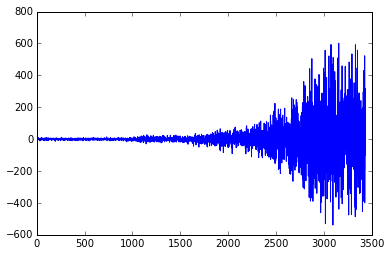

In [6]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 300:
        return x / 300
    else:
        return 1
    
def I(x):
    s = 0
    for i in range(1, 5):
        s = s  +  1 * S(x - cusum[i - 1]) ###
#        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#分散の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 4 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

Populating the interactive namespace from numpy and matplotlib
[ 468.  979.  862.  246.  493.]
[  468.  1447.  2309.  2555.  3048.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


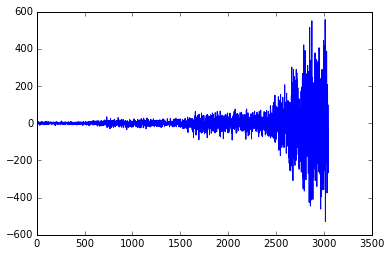

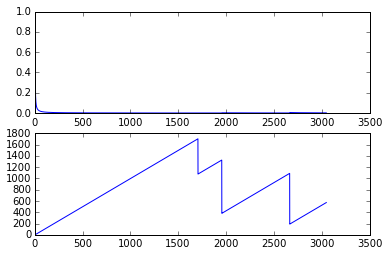

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


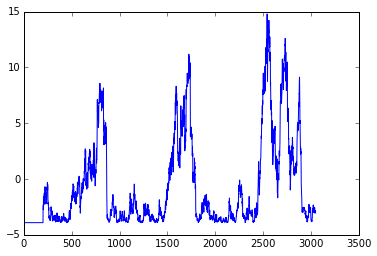

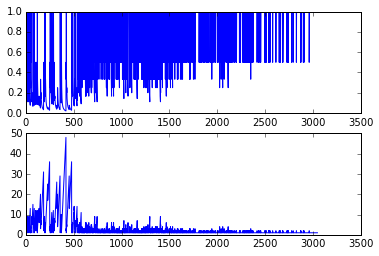

0.53465890761
0.521701915229
0.444983165229


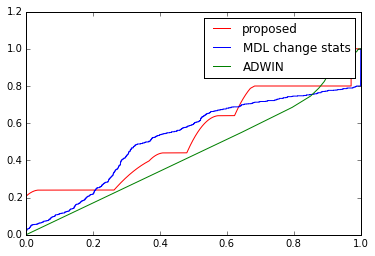

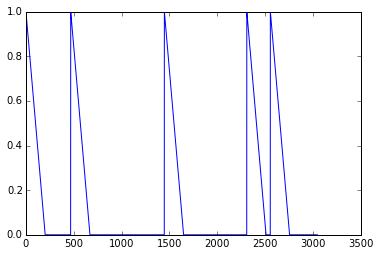

In [41]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 300:
        return x / 300
    else:
        return 1
    
def I(x):
    s = 0
    for i in range(1, 5):
        s = s  +  1 * S(x - cusum[i - 1]) ###
#        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#分散の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 4 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)


Populating the interactive namespace from numpy and matplotlib
[ 215.  755.  689.  728.  938.]

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



[  215.   970.  1659.  2387.  3325.]


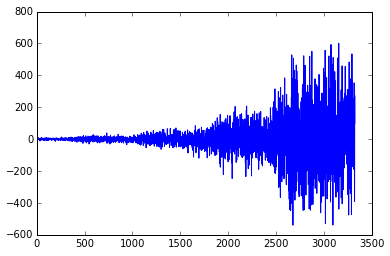

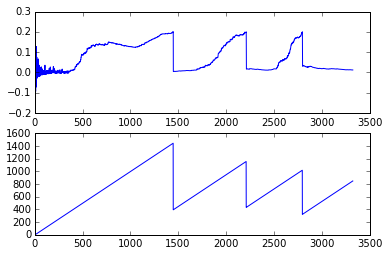

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


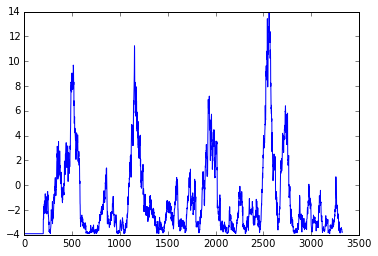

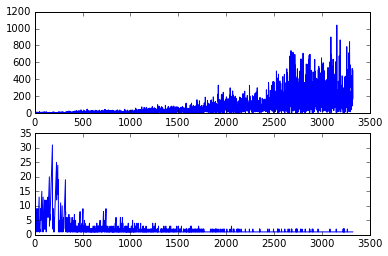

0.251419784946
0.468054623656
0.326205591398


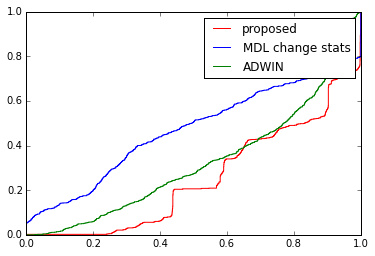

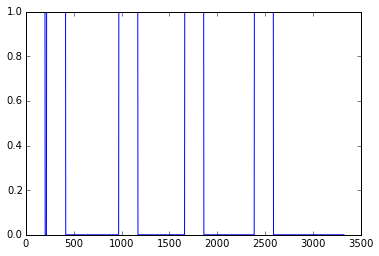

In [1]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 300:
        return x / 300
    else:
        return 1
    
def I(x):
    s = 0
    for i in range(1, 5):
        s = s  +  1 * S(x - cusum[i - 1]) ###
#        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#分散の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 4 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.2)
#score = ev.InvRunLen(size[0])
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
#score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)


In [7]:
plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.13)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

KeyboardInterrupt: 

Populating the interactive namespace from numpy and matplotlib


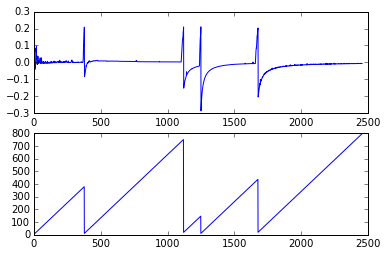

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:26: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


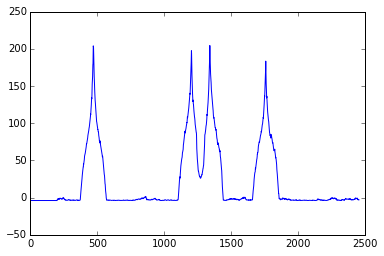

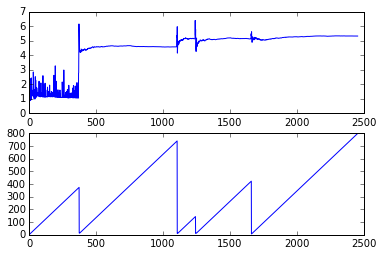

0.297819948808
0.995055431794
0.470202595325


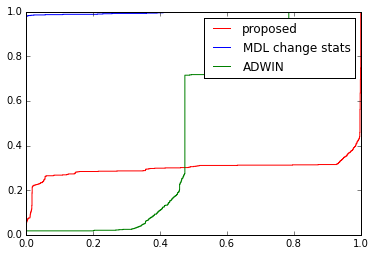

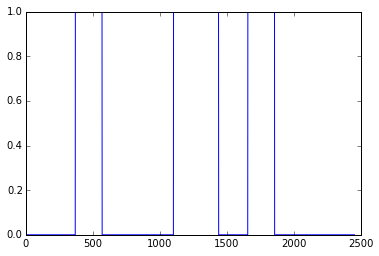

In [5]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

plt.figure(2)
#calculate scores
ins = mdladwn2.MDLCPStat_adwin(lossfunc=mdladwn2.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.2)
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreは統計量の最大値(の最大値)
# benefit は 矩形
T = 200
t_true = cusum[:(n-1)]
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [50]:
import random as rn
import numpy as np

change_step = np.zeros(10)
cusum = np.zeros(10)
change_step[0] = rn.randint(1,500)
cusum[0] = change_step[0]
for i in range(1,10):
    change_step[i] = rn.randint(1,500)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)



def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 10):
        s = s + (10 - i) * H(x - cusum[i - 1])
    return s

mu = np.zeros(cusum[9])
for i in range(0, int(cusum[9])):
    mu[i] = 0.6 * I(i)


[ 381.  267.   72.  279.  411.  319.  329.   97.  161.  369.]
[  381.   648.   720.   999.  1410.  1729.  2058.  2155.  2316.  2685.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Populating the interactive namespace from numpy and matplotlib


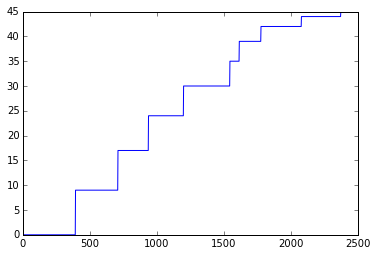

In [68]:
%pylab inline --no-import-all
import matplotlib.pyplot as plt

plt.plot(mu)

In [69]:
cusum[:9]

array([  393.,   710.,   938.,  1200.,  1546.,  1616.,  1778.,  2080.,
        2374.])

In [ ]:
a = [1,2,3]